# MTA Turnstile Data Analysis

#### The New York subway MTA turnstile data is a series of data files containing cumulative number of entries and exits by station, turnstile, date and time. Data files are produced weekly, data records are collected typically every 4 hours with some exceptions

#### the data which i will use now to analyse is from June to Augest for 2020 year 

### Describing the columns of the data 

>> C/A = Control Area (e.g., A002) <br>
>> unit = Remote Unit for a station (e.g., R051)<br>
>> SCP = Subunit Channel Position represents an specific address for a device (e.g., 02-00-00)<br>
>> station_code = C/A + unit, locating a station<br>
>> turnstile = C/A + unit + SCP, locating a turnstile<br>
>> Station = Represents the station name the device is located at<br>
>> date = Represents the date (MM-DD-YY)<br>
>> time = Represents the time (hh:mm:ss) for a scheduled audit event<br>
>> desc = Represent the "REGULAR" scheduled audit event (Normally occurs every 4 hours)<br>
>> entries = The comulative entry register value for a device<br>
>> exits = The cumulative exit register value for a device<br>

### Steps of Exploratory Data Analysis
#### 1.Loading the data <br>
#### 2.Cleaning the data <br>
#### 3. Visualizing The data<br>
#### 4. Conclusion (Insights and summary) <br>

### 1.Loading the data from SQL file 

In [44]:
# Importing some important packages
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from sqlalchemy import create_engine
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
# Load data into Data Frame 
engine = create_engine('sqlite:///mta.db')
df = pd.read_sql('SELECT * FROM test;',engine)

In [46]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISON,DATE,TIME,DESC,ENTRIES,EXITS
0,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS ...
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,00:00:00,REGULAR,7419887,2520505
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,04:00:00,REGULAR,7419888,2520505
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,08:00:00,REGULAR,7419895,2520514
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,12:00:00,REGULAR,7419911,2520531


In [47]:
# information of the data 
df.info

<bound method DataFrame.info of            C/A  UNIT       SCP        STATION  LINENAME   DIVISON        DATE  \
0          C/A  UNIT       SCP        STATION  LINENAME  DIVISION        DATE   
1         A002  R051  02-00-00          59 ST   NQR456W       BMT  05/30/2020   
2         A002  R051  02-00-00          59 ST   NQR456W       BMT  05/30/2020   
3         A002  R051  02-00-00          59 ST   NQR456W       BMT  05/30/2020   
4         A002  R051  02-00-00          59 ST   NQR456W       BMT  05/30/2020   
...        ...   ...       ...            ...       ...       ...         ...   
2704636  TRAM2  R469  00-05-01  RIT-ROOSEVELT         R       RIT  08/28/2020   
2704637  TRAM2  R469  00-05-01  RIT-ROOSEVELT         R       RIT  08/28/2020   
2704638  TRAM2  R469  00-05-01  RIT-ROOSEVELT         R       RIT  08/28/2020   
2704639  TRAM2  R469  00-05-01  RIT-ROOSEVELT         R       RIT  08/28/2020   
2704640  TRAM2  R469  00-05-01  RIT-ROOSEVELT         R       RIT  08/28/2020

In [48]:
# data types of the columns of the data 
df.dtypes

C/A         object
UNIT        object
SCP         object
STATION     object
LINENAME    object
DIVISON     object
DATE        object
TIME        object
DESC        object
ENTRIES     object
EXITS       object
dtype: object

In [49]:
# shape of the data
df.shape

(2704641, 11)

### 2.Data Cleaning

In [50]:
# drop the first row of the data with index zero as it is duplicated
df.drop([0],inplace=True)

In [51]:
# test 
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISON,DATE,TIME,DESC,ENTRIES,EXITS
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,00:00:00,REGULAR,7419887,2520505
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,04:00:00,REGULAR,7419888,2520505
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,08:00:00,REGULAR,7419895,2520514
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,12:00:00,REGULAR,7419911,2520531
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,16:00:00,REGULAR,7419940,2520553


In [52]:
# Check for columns names 
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISON', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [53]:
# change data types of some columns 
# ENTRIES column from object to integer 
# EXISTS column from object to integer

In [54]:
df['ENTRIES']=df['ENTRIES'].convert_dtypes()
df['ENTRIES']=pd.to_numeric(df['ENTRIES'], errors='coerce')
df['ENTRIES']=pd.to_numeric(df['ENTRIES'], errors='coerce').convert_dtypes()

In [55]:
df.ENTRIES.describe

<bound method NDFrame.describe of 1          7419887
2          7419888
3          7419895
4          7419911
5          7419940
            ...   
2704636       5554
2704637       5554
2704638       5554
2704639       5554
2704640       5554
Name: ENTRIES, Length: 2704640, dtype: Int64>

In [56]:
df['EXITS']=df['EXITS'].convert_dtypes()
df['EXITS']=pd.to_numeric(df['EXITS'], errors='coerce')
df['EXITS']=pd.to_numeric(df['EXITS'], errors='coerce').convert_dtypes()

In [57]:
df.EXITS

1          2520505
2          2520505
3          2520514
4          2520531
5          2520553
            ...   
2704636        540
2704637        540
2704638        540
2704639        540
2704640        540
Name: EXITS, Length: 2704640, dtype: Int64

In [58]:
# describing Entries and Exiting columns
df.describe()

,ENTRIES,EXITS
count,2.704628e+06,2.704628e+06
mean,4.290814e+07,3.512178e+07
std,2.184782e+08,1.986975e+08
min,0.000000e+00,0.000000e+00
25%,2.876210e+05,1.248250e+05
50%,1.812793e+06,1.051782e+06
75%,6.471647e+06,4.354503e+06
max,2.128761e+09,2.123286e+09


In [59]:
# Remove non-REGULAR values from 'DESC'
df = df.drop(df.loc[df.DESC != 'REGULAR'].index)

In [60]:
#Creating DATETIME as datetime64 column that concatenate "DATE" and "TIME"
df['DATETIME'] = df["DATE"]+ " " + df["TIME"]
df['DATETIME'] = pd.to_datetime(df['DATETIME'], format='%m/%d/%Y %H:%M:%S',errors='coerce')
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISON,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,00:00:00,REGULAR,7419887,2520505,2020-05-30 00:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,04:00:00,REGULAR,7419888,2520505,2020-05-30 04:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,08:00:00,REGULAR,7419895,2520514,2020-05-30 08:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,12:00:00,REGULAR,7419911,2520531,2020-05-30 12:00:00
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,16:00:00,REGULAR,7419940,2520553,2020-05-30 16:00:00


In [61]:
# Create DAY_OF_WEEK column from DATE
df["NAME_OF_DAY"]= df["DATETIME"].dt.day_name()

In [62]:
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISON,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,NAME_OF_DAY
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,00:00:00,REGULAR,7419887,2520505,2020-05-30 00:00:00,Saturday
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,04:00:00,REGULAR,7419888,2520505,2020-05-30 04:00:00,Saturday
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,08:00:00,REGULAR,7419895,2520514,2020-05-30 08:00:00,Saturday
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,12:00:00,REGULAR,7419911,2520531,2020-05-30 12:00:00,Saturday
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/30/2020,16:00:00,REGULAR,7419940,2520553,2020-05-30 16:00:00,Saturday


In [63]:
df.DATETIME

1         2020-05-30 00:00:00
2         2020-05-30 04:00:00
3         2020-05-30 08:00:00
4         2020-05-30 12:00:00
5         2020-05-30 16:00:00
                  ...        
2704636   2020-08-28 05:00:00
2704637   2020-08-28 09:00:00
2704638   2020-08-28 13:00:00
2704639   2020-08-28 17:00:00
2704640   2020-08-28 21:00:00
Name: DATETIME, Length: 2692629, dtype: datetime64[ns]

In [64]:
# Adding "TURNSTILE" columns that concatenate 'C/A', 'UNIT', 'SCP'
df["TURNSTILE"] = df["C/A"] + "-" + df["UNIT"] + "-" + df["SCP"]

In [65]:
# Drop unnecessary columns
df = df.drop(['LINENAME', 'DIVISON', 'DESC', 'DATE', 'TIME','C/A','UNIT','SCP'], axis=1)

In [66]:
df.head()

,STATION,ENTRIES,EXITS,DATETIME,NAME_OF_DAY,TURNSTILE
1,59 ST,7419887,2520505,2020-05-30 00:00:00,Saturday,A002-R051-02-00-00
2,59 ST,7419888,2520505,2020-05-30 04:00:00,Saturday,A002-R051-02-00-00
3,59 ST,7419895,2520514,2020-05-30 08:00:00,Saturday,A002-R051-02-00-00
4,59 ST,7419911,2520531,2020-05-30 12:00:00,Saturday,A002-R051-02-00-00
5,59 ST,7419940,2520553,2020-05-30 16:00:00,Saturday,A002-R051-02-00-00


In [67]:
#Finding First and last date in dataframe
print("First date: ")
print(df["DATETIME"].min())
print()
print("Last date: ")
print(df["DATETIME"].max())

First date: 
2020-05-30 00:00:00

Last date: 
2020-08-28 23:59:47


In [68]:
#Checking Unique TURNSTILE count
len(df["TURNSTILE"].unique())

4987

In [69]:
#Checking Unique Station count
len(df["STATION"].unique())

379

In [70]:
#Checking top 10 stations count
stations_top = df["STATION"].value_counts().sort_values(ascending=False)
print("number of records based on stations >>> First top 10 stations",'\n',stations_top.head(10))

number of records based on stations >>> First top 10 stations 
 34 ST-PENN STA     53925
FULTON ST          52312
GRD CNTRL-42 ST    40375
23 ST              39665
86 ST              34696
CANAL ST           31651
CHAMBERS ST        29323
34 ST-HERALD SQ    29246
14 ST              27877
42 ST-PORT AUTH    27456
Name: STATION, dtype: int64


In [71]:
# group data by turnstile
# sort each turnstile by datetime
df_sort = df.sort_values(['TURNSTILE', 'DATETIME'])
df_sort = df_sort.reset_index(drop = True)
turnstile_group = df_sort.groupby(['TURNSTILE'])

In [72]:
# Add new columns en_diff and ex_diff for each unique turnstile
df_sort['ENTRIES_DIFF'] = turnstile_group['ENTRIES'].transform(pd.Series.diff)
df_sort['EXITS_DIFF'] = turnstile_group['EXITS'].transform(pd.Series.diff)

In [73]:
df_sort.head()

,STATION,ENTRIES,EXITS,DATETIME,NAME_OF_DAY,TURNSTILE,ENTRIES_DIFF,EXITS_DIFF
0,59 ST,7419887,2520505,2020-05-30 00:00:00,Saturday,A002-R051-02-00-00,<NA>,<NA>
1,59 ST,7419888,2520505,2020-05-30 04:00:00,Saturday,A002-R051-02-00-00,1,0
2,59 ST,7419895,2520514,2020-05-30 08:00:00,Saturday,A002-R051-02-00-00,7,9
3,59 ST,7419911,2520531,2020-05-30 12:00:00,Saturday,A002-R051-02-00-00,16,17
4,59 ST,7419940,2520553,2020-05-30 16:00:00,Saturday,A002-R051-02-00-00,29,22


In [74]:
# Add total traffic column which is the sum of Entries difference and exits difference 
df_sort['TOTAL_TRAFFIC'] = df_sort['ENTRIES_DIFF'] + df_sort['EXITS_DIFF']
df_sort.head()

,STATION,ENTRIES,EXITS,DATETIME,NAME_OF_DAY,TURNSTILE,ENTRIES_DIFF,EXITS_DIFF,TOTAL_TRAFFIC
0,59 ST,7419887,2520505,2020-05-30 00:00:00,Saturday,A002-R051-02-00-00,<NA>,<NA>,<NA>
1,59 ST,7419888,2520505,2020-05-30 04:00:00,Saturday,A002-R051-02-00-00,1,0,1
2,59 ST,7419895,2520514,2020-05-30 08:00:00,Saturday,A002-R051-02-00-00,7,9,16
3,59 ST,7419911,2520531,2020-05-30 12:00:00,Saturday,A002-R051-02-00-00,16,17,33
4,59 ST,7419940,2520553,2020-05-30 16:00:00,Saturday,A002-R051-02-00-00,29,22,51


In [75]:
# drop the first row 
df_sort.drop([0],inplace=True)

In [76]:
# drop unnecessary columns 
df_sort.drop(['ENTRIES','EXITS',],axis=1,inplace=True)

In [77]:
df_sort.head()

,STATION,DATETIME,NAME_OF_DAY,TURNSTILE,ENTRIES_DIFF,EXITS_DIFF,TOTAL_TRAFFIC
1,59 ST,2020-05-30 04:00:00,Saturday,A002-R051-02-00-00,1,0,1
2,59 ST,2020-05-30 08:00:00,Saturday,A002-R051-02-00-00,7,9,16
3,59 ST,2020-05-30 12:00:00,Saturday,A002-R051-02-00-00,16,17,33
4,59 ST,2020-05-30 16:00:00,Saturday,A002-R051-02-00-00,29,22,51
5,59 ST,2020-05-30 20:00:00,Saturday,A002-R051-02-00-00,37,8,45


In [78]:
#check for null values
df_sort.isnull().sum()

STATION             0
DATETIME            0
NAME_OF_DAY         0
TURNSTILE           0
ENTRIES_DIFF     4986
EXITS_DIFF       4986
TOTAL_TRAFFIC    4986
dtype: int64

In [79]:
# check for negative values in Entries_diff and Exits_diff 
print(len(df_sort['ENTRIES_DIFF'][df_sort['ENTRIES_DIFF'] < 0]))

20944


In [80]:
# check for negative values in Exits_diff 
print(len(df_sort['EXITS_DIFF'][df_sort['EXITS_DIFF'] < 0]))

17048


In [81]:
# we need some data cleaning to fill the nan values with zero 
df_sort['ENTRIES_DIFF'] = df_sort['ENTRIES_DIFF'].fillna(0)
df_sort['EXITS_DIFF'] = df_sort['EXITS_DIFF'].fillna(0)
df_sort['TOTAL_TRAFFIC'] = df_sort['TOTAL_TRAFFIC'].fillna(0)

In [82]:
# we need some data cleaning to fill the negative values with zero
df_sort['ENTRIES_DIFF'][df_sort['ENTRIES_DIFF'] < 0] = 0 
df_sort['EXITS_DIFF'][df_sort['EXITS_DIFF'] < 0] = 0
df_sort['TOTAL_TRAFFIC'][df_sort['TOTAL_TRAFFIC'] < 0] = 0

In [83]:
df_sort.isnull().sum()

STATION          0
DATETIME         0
NAME_OF_DAY      0
TURNSTILE        0
ENTRIES_DIFF     0
EXITS_DIFF       0
TOTAL_TRAFFIC    0
dtype: int64

In [84]:
df_sort.head()

,STATION,DATETIME,NAME_OF_DAY,TURNSTILE,ENTRIES_DIFF,EXITS_DIFF,TOTAL_TRAFFIC
1,59 ST,2020-05-30 04:00:00,Saturday,A002-R051-02-00-00,1,0,1
2,59 ST,2020-05-30 08:00:00,Saturday,A002-R051-02-00-00,7,9,16
3,59 ST,2020-05-30 12:00:00,Saturday,A002-R051-02-00-00,16,17,33
4,59 ST,2020-05-30 16:00:00,Saturday,A002-R051-02-00-00,29,22,51
5,59 ST,2020-05-30 20:00:00,Saturday,A002-R051-02-00-00,37,8,45


In [85]:
# Create DATE and TIME column for easier access later
df_sort["DATE"] = pd.to_datetime(df_sort['DATETIME']).dt.date
df_sort["TIME"] = pd.to_datetime(df_sort['DATETIME']).dt.time
df_sort.head()

,STATION,DATETIME,NAME_OF_DAY,TURNSTILE,ENTRIES_DIFF,EXITS_DIFF,TOTAL_TRAFFIC,DATE,TIME
1,59 ST,2020-05-30 04:00:00,Saturday,A002-R051-02-00-00,1,0,1,2020-05-30,04:00:00
2,59 ST,2020-05-30 08:00:00,Saturday,A002-R051-02-00-00,7,9,16,2020-05-30,08:00:00
3,59 ST,2020-05-30 12:00:00,Saturday,A002-R051-02-00-00,16,17,33,2020-05-30,12:00:00
4,59 ST,2020-05-30 16:00:00,Saturday,A002-R051-02-00-00,29,22,51,2020-05-30,16:00:00
5,59 ST,2020-05-30 20:00:00,Saturday,A002-R051-02-00-00,37,8,45,2020-05-30,20:00:00


## Visualization and Graphs 

## Plot the most busiest stations 

In [86]:
# Table for each STATION daily TOTAL TRAFFIC
daily_station = df_sort.groupby(["STATION","DATE"])[['TOTAL_TRAFFIC']].sum().reset_index()
daily_station.head()

,STATION,DATE,TOTAL_TRAFFIC
0,1 AV,2020-05-30,2851
1,1 AV,2020-05-31,2896
2,1 AV,2020-06-01,5882
3,1 AV,2020-06-02,6150
4,1 AV,2020-06-03,5958


In [87]:
# Table for each STATION sum TOTAL TRAFFIC during pandemic
"""
Sum up the total ridership for each station during pandemic and sort them based on traffic volume
to find out the traffic pattern and top 10 stations with the highest traffic during pandemic
"""
stations_total = daily_station.groupby('STATION').sum()\
    .sort_values('TOTAL_TRAFFIC', ascending=False)\
    .reset_index()
#test
stations_total.head(10)

,STATION,TOTAL_TRAFFIC
0,WORLD TRADE CTR,6573252830
1,191 ST,2326619985
2,BAY RIDGE AV,2323181235
3,HUNTS POINT AV,1521254583
4,4AV-9 ST,837227294
5,96 ST-2 AVE,717826547
6,TREMONT AV,467529688
7,CROWN HTS-UTICA,31614104
8,34 ST-PENN STA,20614565
9,207 ST,19979807


In [88]:
station_avgerage = daily_station.groupby('STATION').mean()\
    .sort_values('TOTAL_TRAFFIC', ascending=False)\
    .reset_index()

In [89]:
#Round the values of Total traffic column 
station_avgerage['TOTAL_TRAFFIC']=station_avgerage['TOTAL_TRAFFIC'].apply(np.floor)

In [90]:
#test
station_avgerage.head(10)

,STATION,TOTAL_TRAFFIC
0,WORLD TRADE CTR,74696054.0
1,191 ST,25567252.0
2,BAY RIDGE AV,25529464.0
3,HUNTS POINT AV,16717083.0
4,4AV-9 ST,9200299.0
5,96 ST-2 AVE,7888203.0
6,TREMONT AV,5137688.0
7,CROWN HTS-UTICA,347407.0
8,34 ST-PENN STA,226533.0
9,207 ST,221997.0


C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


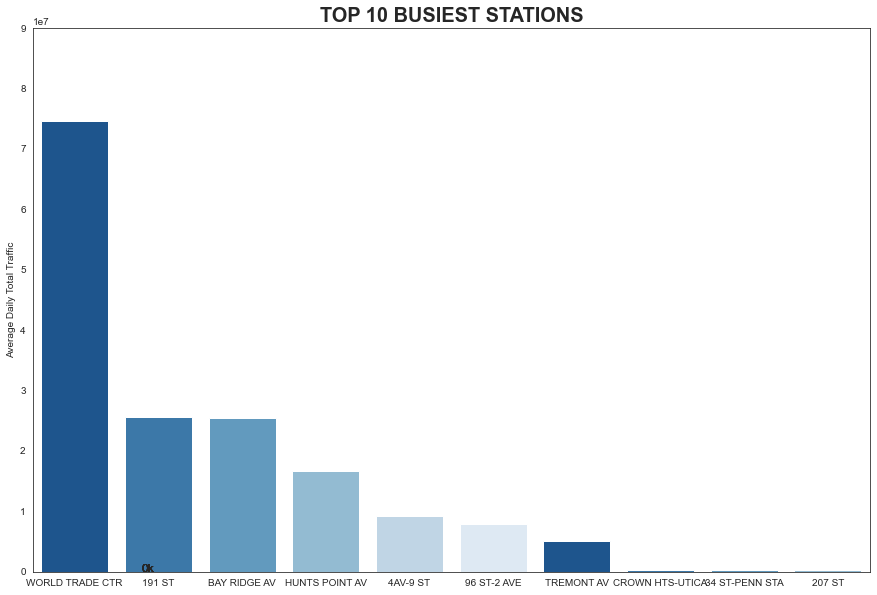

In [91]:
# Barplot for top 10 busiest subway
top_10_avg_daily = station_avgerage[:10]
plt.figure(figsize=[15,10])
sns.set_style("white")
palette = sns.color_palette("Blues")
palette.reverse()
ax = sns.barplot('STATION','TOTAL_TRAFFIC', data=top_10_avg_daily, orient="vertical", palette=palette)

plt.title('TOP 10 BUSIEST STATIONS', size=20, weight='bold')
plt.ylabel("Average Daily Total Traffic", size=10)
plt.xlabel("")
plt.ylim([0,90000000])
plt.xticks(size=10)
for p in ax.patches:
        ax.annotate(str(int(p.get_width()/1000))+'k', (p.get_width(), p.get_x()+0.5), size=12);

plt.savefig("Top10BusiestSubway.png")

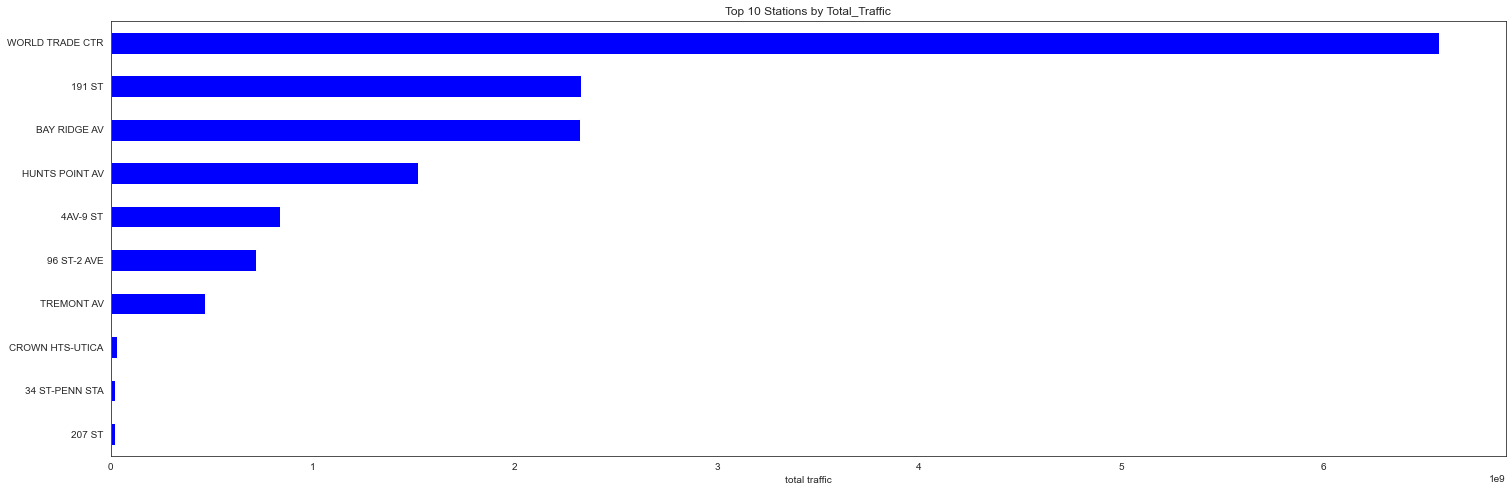

In [92]:
top_10 =df_sort.groupby(['STATION']).agg({'TOTAL_TRAFFIC': sum}).sort_values(by = 'TOTAL_TRAFFIC', ascending = False).head(10)

fig, ax = plt.subplots(figsize=(25, 8))
top_10.sort_values(by = 'TOTAL_TRAFFIC',ascending=True).plot(kind='barh', color ='blue',ax=ax)
ax.set(title='Top 10 Stations by Total_Traffic', xlabel='total traffic', ylabel='')
ax.legend().set_visible(False)

## Top most days which have a most traffic

In [93]:
# Top 10 Stations list
top10_list = list(top_10_avg_daily['STATION'])
print(top10_list)

# Top 10 Stations df
top10_df = df_sort[df_sort['STATION'].isin(top10_list)]
top10_df.head()

['WORLD TRADE CTR', '191 ST', 'BAY RIDGE AV', 'HUNTS POINT AV', '4AV-9 ST', '96 ST-2 AVE', 'TREMONT AV', 'CROWN HTS-UTICA', '34 ST-PENN STA', '207 ST']


,STATION,DATETIME,NAME_OF_DAY,TURNSTILE,ENTRIES_DIFF,EXITS_DIFF,TOTAL_TRAFFIC,DATE,TIME
280340,4AV-9 ST,2020-05-30 00:00:00,Saturday,C012-R258-01-00-00,0,0,0,2020-05-30,00:00:00
280341,4AV-9 ST,2020-05-30 04:00:00,Saturday,C012-R258-01-00-00,3,7,10,2020-05-30,04:00:00
280342,4AV-9 ST,2020-05-30 08:00:00,Saturday,C012-R258-01-00-00,14,18,32,2020-05-30,08:00:00
280343,4AV-9 ST,2020-05-30 12:00:00,Saturday,C012-R258-01-00-00,18,28,46,2020-05-30,12:00:00
280344,4AV-9 ST,2020-05-30 16:00:00,Saturday,C012-R258-01-00-00,30,21,51,2020-05-30,16:00:00


In [94]:
## Create Pivot table for Day_of_Week vs Stations traffic pattern
# Top 10 Stations daily 
top10_daily = top10_df.groupby(["STATION","DATE","NAME_OF_DAY"])[['TOTAL_TRAFFIC']].sum().reset_index()

# Top 10 Stations avg day of week
top10_dow = top10_daily.groupby(['STATION','NAME_OF_DAY'])['TOTAL_TRAFFIC']\
                .mean()\
                .reset_index().sort_values('TOTAL_TRAFFIC',ascending=False)

# Turn top10_dow_hm into pivot table for heatmap
top10_dow_hm = top10_dow.pivot(index=["STATION"], columns=['NAME_OF_DAY'], values='TOTAL_TRAFFIC')
print(top10_dow_hm.columns)
top10_dow_hm.columns = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
top10_dow_hm = top10_dow_hm.reindex(top10_list)
top10_dow_hm

Index(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object', name='NAME_OF_DAY')


,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
STATION,,,,,,,
WORLD TRADE CTR,144547484.923077,3934.833333,41299871.153846,129143238.083333,4336.923077,129145921.166667,81358745.538462
191 ST,1131.230769,958.307692,885.769231,177448366.461538,1214.846154,976.461538,1517235.0
BAY RIDGE AV,3492.230769,3582.0,178686426.692308,2051.0,3624.461538,3510.692308,3561.769231
HUNTS POINT AV,116986091.692308,6351.384615,4216.538462,3611.384615,6492.0,6346.307692,6474.0
4AV-9 ST,3534.384615,3459.0,2587.076923,64381726.153846,3747.846154,3553.153846,3491.923077
96 ST-2 AVE,55145074.461538,39005.307692,4683.846154,4051.0,8233.076923,8059.230769,8319.769231
TREMONT AV,5902.0,35933211.076923,4079.153846,3291.538462,5665.076923,5666.384615,6006.923077
CROWN HTS-UTICA,16694.692308,15944.538462,2340013.384615,9324.076923,16699.538462,16215.230769,16962.692308
34 ST-PENN STA,51812.307692,50864.461538,45422.692308,25263.076923,52489.461538,1308171.230769,51712.538462


In [95]:
# round all values in top10_dow table
top10_dow_hm['Monday'] =top10_dow_hm['Monday'].apply(np.floor)
top10_dow_hm['Tuesday'] =top10_dow_hm['Tuesday'].apply(np.floor)
top10_dow_hm['Wednesday'] =top10_dow_hm['Wednesday'].apply(np.floor)
top10_dow_hm['Thursday'] =top10_dow_hm['Thursday'].apply(np.floor)
top10_dow_hm['Friday'] =top10_dow_hm['Friday'].apply(np.floor)
top10_dow_hm['Saturday'] =top10_dow_hm['Saturday'].apply(np.floor)
top10_dow_hm['Sunday'] =top10_dow_hm['Sunday'].apply(np.floor)

In [96]:
#test
top10_dow_hm

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
STATION,,,,,,,
WORLD TRADE CTR,144547484.0,3934.0,41299871.0,129143238.0,4336.0,129145921.0,81358745.0
191 ST,1131.0,958.0,885.0,177448366.0,1214.0,976.0,1517235.0
BAY RIDGE AV,3492.0,3582.0,178686426.0,2051.0,3624.0,3510.0,3561.0
HUNTS POINT AV,116986091.0,6351.0,4216.0,3611.0,6492.0,6346.0,6474.0
4AV-9 ST,3534.0,3459.0,2587.0,64381726.0,3747.0,3553.0,3491.0
96 ST-2 AVE,55145074.0,39005.0,4683.0,4051.0,8233.0,8059.0,8319.0
TREMONT AV,5902.0,35933211.0,4079.0,3291.0,5665.0,5666.0,6006.0
CROWN HTS-UTICA,16694.0,15944.0,2340013.0,9324.0,16699.0,16215.0,16962.0
34 ST-PENN STA,51812.0,50864.0,45422.0,25263.0,52489.0,1308171.0,51712.0


In [97]:
## Create Pivot table for Day_of_Week vs Time_Period traffic pattern
# Timeperiod dictionary
top10_df['TIME']= top10_df.TIME.astype('str')
time_period = {
    "04:00:00": "00:00-04:00",
    "08:00:00": "04:00-08:00",
    "12:00:00": "08:00-12:00",
    "16:00:00": "12:00-16:00",
    "20:00:00": "16:00-20:00",
    "00:00:00": "20:00-00:00"
}
top10_df['TIME_PERIOD'] = top10_df.TIME.map(time_period)

# Group by Date and time for total count across the stations
top10_period = top10_df.groupby(['DATE', 'NAME_OF_DAY', 'TIME_PERIOD'])['TOTAL_TRAFFIC']\
                        .sum().reset_index()

# Group by Day of Week and time period for the average count
period_time = top10_period.groupby(['NAME_OF_DAY', 'TIME_PERIOD'])['TOTAL_TRAFFIC']\
                            .mean().reset_index()

# Pivot table for time vs day of week
time_vs_day = period_time.pivot(index=["TIME_PERIOD"], columns=['NAME_OF_DAY'], values='TOTAL_TRAFFIC')
time_vs_day.columns = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
time_vs_day

<ipython-input-97-e38186d05ba5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10_df['TIME']= top10_df.TIME.astype('str')
<ipython-input-97-e38186d05ba5>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10_df['TIME_PERIOD'] = top10_df.TIME.map(time_period)


,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
TIME_PERIOD,,,,,,,
00:00-04:00,760.0,753.538462,41298728.384615,934.769231,915.923077,731.461538,770.153846
04:00-08:00,11048.0,11879.0,4259.461538,183589992.615385,12120.384615,119220060.692308,11873.0
08:00-12:00,144557421.538462,13884.923077,181021362.538462,6336.0,14158.461538,1270692.153846,18028.384615
12:00-16:00,17312.153846,16061.307692,11711.307692,9347.923077,16789.0,16269.923077,18888.153846
16:00-20:00,18734.538462,18235.153846,25840.230769,177457017.307692,19197.230769,17949.076923,1534983.153846
20:00-00:00,6449.076923,1522328.307692,6045.538462,6022.692308,6329.461538,6200.153846,81354944.076923


In [98]:
# round all values in time_vs_day table
time_vs_day['Monday'] =time_vs_day['Monday'].apply(np.floor)
time_vs_day['Tuesday'] =time_vs_day['Tuesday'].apply(np.floor)
time_vs_day['Wednesday'] =time_vs_day['Wednesday'].apply(np.floor)
time_vs_day['Thursday'] =time_vs_day['Thursday'].apply(np.floor)
time_vs_day['Friday'] =time_vs_day['Friday'].apply(np.floor)
time_vs_day['Saturday'] =time_vs_day['Saturday'].apply(np.floor)
time_vs_day['Sunday'] =time_vs_day['Sunday'].apply(np.floor)

In [99]:
time_vs_day

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
TIME_PERIOD,,,,,,,
00:00-04:00,760.0,753.0,41298728.0,934.0,915.0,731.0,770.0
04:00-08:00,11048.0,11879.0,4259.0,183589992.0,12120.0,119220060.0,11873.0
08:00-12:00,144557421.0,13884.0,181021362.0,6336.0,14158.0,1270692.0,18028.0
12:00-16:00,17312.0,16061.0,11711.0,9347.0,16789.0,16269.0,18888.0
16:00-20:00,18734.0,18235.0,25840.0,177457017.0,19197.0,17949.0,1534983.0
20:00-00:00,6449.0,1522328.0,6045.0,6022.0,6329.0,6200.0,81354944.0


In [100]:
# convert columns in top10_dow_hm Tables to int to plot the heat map
top10_dow_hm=top10_dow_hm.astype({col:int for col in top10_dow_hm.columns})

In [101]:
#test
top10_dow_hm.dtypes

Monday       int32
Tuesday      int32
Wednesday    int32
Thursday     int32
Friday       int32
Saturday     int32
Sunday       int32
dtype: object

In [102]:
# convert columns in top10_dow_hm Tables to int to plot the heat map
time_vs_day=time_vs_day.astype({col:int for col in top10_dow_hm.columns})

In [103]:
time_vs_day.dtypes

Monday       int32
Tuesday      int32
Wednesday    int32
Thursday     int32
Friday       int32
Saturday     int32
Sunday       int32
dtype: object

## Top 10 Stations Traffic pattern

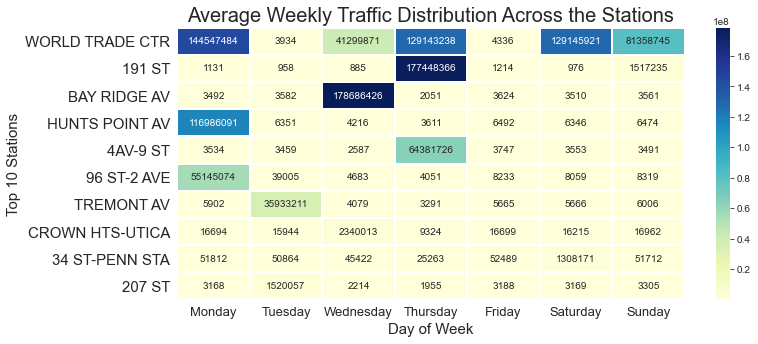

In [104]:
# Heatmaps for traffic pattern in top 10 stations
plt.figure(figsize=[25,5])
plt.subplot(1,2,1)
sns.heatmap(top10_dow_hm, cmap='YlGnBu', linecolor='white', linewidths=1, annot=True, fmt=".0f", annot_kws={"size":10})
plt.title("Average Weekly Traffic Distribution Across the Stations", size=20)
plt.xlabel("Day of Week", size=15)
plt.ylabel("Top 10 Stations", size=15)
plt.xticks(size=13)
plt.yticks(size=15, rotation=0);

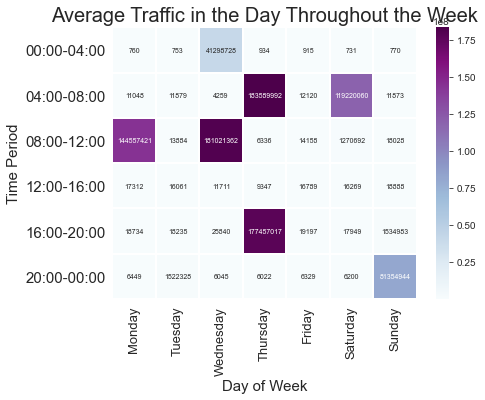

In [105]:
plt.figure(figsize=[15,5])
plt.subplot(1,2,2)
sns.heatmap(time_vs_day, cmap='BuPu', linecolor='white', linewidths=1, annot=True, fmt=".0f", annot_kws={"size":7})
plt.title("Average Traffic in the Day Throughout the Week", size=20)
plt.xlabel("Day of Week", size=15)
plt.ylabel("Time Period", size=15)
plt.xticks(size=13)
plt.yticks(size=15, rotation = 0);

plt.savefig("Heatmaps.png")

## Conclusion and Summary
1.from the above Exploratory Data analysis we can conclude that the most traffic station is the "world trade CTR" station as we see this from the above plots. we also can deduce that the top 10 stations which have most traffics are ['WORLD TRADE CTR', '191 ST', 'BAY RIDGE AV', 'HUNTS POINT AV', '4AV-9 ST', '96 ST-2 AVE', 'TREMONT AV', 'CROWN HTS-UTICA', '207 ST', 'BOWERY']. Also we can see that Monday is the most traffic day for the "world trade CTR " and at time 12 AM is the busiest hour traffic in the day.<br>
2.the most busiest day for "191 ST " Station is thursday<br>
3.4 AM is the most traffic hour at wednesday At "BAY BRIDGE AV" station.<br>
4.the most busiest day for "HUNTS POINT AV " Station is monday<br>
5.the most busiest day for "4AV-9 ST " Station is thursday<br>
6.the most busiest day for "96 ST-2 AVE " Station is monday<br>
7.6.the most busiest day for "TREMONT AV " Station is tuesday<br>
 